In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import random
import copy

In [25]:
# creating dictionary of 64 possible combinations of three precvious games
from itertools import permutations,product

prisonersDict = {}

values = ['C', 'D']
perm = product(values, repeat = 6)

count = 0
for val in perm:
    key = ''.join(val)
    prisonersDict[key] = count
    count += 1
# print(prisonersDict)

for key in prisonersDict:
    print(f'{key} - {prisonersDict[key]}')

CCCCCC - 0
CCCCCD - 1
CCCCDC - 2
CCCCDD - 3
CCCDCC - 4
CCCDCD - 5
CCCDDC - 6
CCCDDD - 7
CCDCCC - 8
CCDCCD - 9
CCDCDC - 10
CCDCDD - 11
CCDDCC - 12
CCDDCD - 13
CCDDDC - 14
CCDDDD - 15
CDCCCC - 16
CDCCCD - 17
CDCCDC - 18
CDCCDD - 19
CDCDCC - 20
CDCDCD - 21
CDCDDC - 22
CDCDDD - 23
CDDCCC - 24
CDDCCD - 25
CDDCDC - 26
CDDCDD - 27
CDDDCC - 28
CDDDCD - 29
CDDDDC - 30
CDDDDD - 31
DCCCCC - 32
DCCCCD - 33
DCCCDC - 34
DCCCDD - 35
DCCDCC - 36
DCCDCD - 37
DCCDDC - 38
DCCDDD - 39
DCDCCC - 40
DCDCCD - 41
DCDCDC - 42
DCDCDD - 43
DCDDCC - 44
DCDDCD - 45
DCDDDC - 46
DCDDDD - 47
DDCCCC - 48
DDCCCD - 49
DDCCDC - 50
DDCCDD - 51
DDCDCC - 52
DDCDCD - 53
DDCDDC - 54
DDCDDD - 55
DDDCCC - 56
DDDCCD - 57
DDDCDC - 58
DDDCDD - 59
DDDDCC - 60
DDDDCD - 61
DDDDDC - 62
DDDDDD - 63


In [26]:
#Generating strategy: Tit 4 Tat (does whatever the other player did in the previous game)
def tit4tat():
    tit4tatStrat = ''
    for key in prisonersDict.keys():
        tit4tatStrat += key[5]               #grabing the last value from the key and adding it to the strategy specific string
    return tit4tatStrat

#Generating strategy: Random Decision (weight = .5 to get random strategy of C vs D)
def randomDec():
    randomDecStrat = ''
    for i in range(64):
        num = random.random()
        if num < .5:
            randomDecStrat += 'C'
        else:
            randomDecStrat += 'D'
    return randomDecStrat


#Generating strategy: twoToTrust (partner needs to cooperate 2* in row or else defects)
# def twoToTrust():
#     twoToTrustStrat = ''
#     for key in prisonersDict.keys():
#         lastPartnerMove = key[5]
#         second2lastPartnerMove = key[3]
#         if lastPartnerMove == 'C' and second2lastPartnerMove == 'C':
#             twoToTrustStrat += 'C'
#         else:
#             twoToTrustStrat += 'D'
#     return twoToTrustStrat

#Generating strategy: alwaysDefect 
def alwaysDefect():
    alwayDefectStrat = ''
    for key in prisonersDict.keys():
        alwayDefectStrat += 'D'
    return alwayDefectStrat

#Generating strategy: alwaysCooperate
def alwaysCooperate():
    alwaysCooperateStrat = ''
    for key in prisonersDict.keys():
        alwaysCooperateStrat += 'C'
    return alwaysCooperateStrat


#Generating strategy: biasForCooperation (partner coooperated once in last three games)
def biasForCooperation():
    biasForCooperationStrat = ''
    for key in prisonersDict.keys():
        lastPartnerMove = key[5]
        second2lastPartnerMove = key[3]
        third2LastPartnerMove = key[1]
        if lastPartnerMove == 'C' or second2lastPartnerMove == 'C' or third2LastPartnerMove == 'C':
            biasForCooperationStrat += 'C'
        else:
            biasForCooperationStrat += 'D'
    return biasForCooperationStrat

#Generating strategy: copyMajority (Do what the partner did majority of the time in last 3 games)
def copyMajority():
    copyMajorityStrat = ''
    for key in prisonersDict.keys():
        cCount = 0
        dCount = 0
        for position in range(0,len(key),2):
            if key[position] == 'C':
                cCount += 1
            else:
                dCount += 1
        if cCount > dCount:
            copyMajorityStrat += 'C'
        else:
            copyMajorityStrat += 'D'
    return copyMajorityStrat 

In [27]:
#FIRST PrisonerDilemma Class with fitness function and recombination being applied at every game

from itertools import combinations
import random

class PrisonerDilemma():
    
    def __init__(self, recombProb = .1, movesPlayed = 40, numberRuns = 1):
        global prisonersDict
        self.prisonersDict = prisonersDict                                                                          
        self.recombProb = recombProb
        self.movesPlayed = movesPlayed 
        self.numberRuns = numberRuns
        
        #randomly generate the last 3games, which strategies will use to make first move
        values = ['C', 'D']
        rando3Games = np.random.choice(values, 6)           #creating random 6 values of C or D
        self.default3Games = ''.join(rando3Games)           #removing sapces/joining

        t4t = tit4tat()
        random = randomDec()
        biasForCoop = biasForCooperation()
        defect = alwaysDefect()
        coop = alwaysCooperate()
        copyMaj = copyMajority()

        self.pop = [
            {'name' : 'tit4tat', 'strat': t4t, 'last3Moves': self.default3Games, 'scores' : [], 'totalScore': 0, 'original' : copy.deepcopy(t4t)},
            {'name' : 'randomDec', 'strat': random,'last3Moves': self.default3Games, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(random)}, 
            {'name' : 'biasForCooperation', 'strat': biasForCoop, 'last3Moves': self.default3Games, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(biasForCoop)}, 
            {'name' : 'alwaysDefect', 'strat': defect, 'last3Moves': self.default3Games, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(defect)},
            {'name' : 'alwaysCoop', 'strat': coop, 'last3Moves': self.default3Games, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(coop)}, 
            {'name' : 'copyMajority', 'strat': copyMaj, 'last3Moves': self.default3Games, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(copyMaj)}
        ]
                    
    def runTournament(self):
        for tourny in range(self.numberRuns):
            games = list(combinations(self.pop, 2))   #each strat will paly everyother strat once
            random.shuffle(games)
            for (strat1, strat2) in games:      #strat1 and 2 will reference the strategies playing in the current game
                #print(f'{strat1['name']} vs {strat2['name']}') # combinations causes the strategies to play eachother in set order
                self.strat1CurrentGameScore = 0
                self.strat2CurrentGameScore = 0
                for num in range(self.movesPlayed + 1):     #default 40 moves made per game
                    #calls find move funciton to have strategy pic move based on last 3 games
                    moveStrat1 = self.findMove(strat1)       
                    moveStrat2 = self.findMove(strat2)
                    #compares moves to determine points earned and total score
                    self.compareMovesAndUpdateScore(moveStrat1, moveStrat2, strat1, strat2)         
                    #updates memory aka the last 3 games
                    self.updateMemory(moveStrat1, moveStrat2, strat1, strat2)
                
                #Fitness Function and Recombination getting applied
                self.fitnessFunctionandRecombination(strat1, strat2)
                #adding to array of scores from each game
                strat1['scores'].append(self.strat1CurrentGameScore)
                strat2['scores'].append(self.strat2CurrentGameScore)
                #at end of game need to reset last3Moves to default
                strat1['last3Moves'] = self.default3Games
                strat2['last3Moves'] = self.default3Games
    
    def findMove(self, currentStrat):
        index = self.prisonersDict[currentStrat['last3Moves']]
        return currentStrat['strat'][index]
    
    def compareMovesAndUpdateScore(self, moveStrat1, moveStrat2, strat1, strat2):
        if moveStrat1 == 'C' and moveStrat2 == 'C':
            strat1['totalScore'] += 3
            strat2['totalScore'] += 3
            self.strat1CurrentGameScore += 3
            self.strat2CurrentGameScore += 3
        elif moveStrat1 == 'C' and moveStrat2 == 'D':
            strat2['totalScore'] += 5
            self.strat2CurrentGameScore += 5
        elif moveStrat1 == 'D' and moveStrat2 == 'C':
            strat1['totalScore'] += 5
            self.strat1CurrentGameScore += 5
        else:
            strat1['totalScore'] += 1
            strat2['totalScore'] += 1
            self.strat1CurrentGameScore += 1
            self.strat2CurrentGameScore += 1

    def updateMemory(self, moveStrat1, moveStrat2, strat1, strat2):
        strat1['last3Moves'] = strat1['last3Moves'][2:] + moveStrat1 + moveStrat2
        strat2['last3Moves'] = strat2['last3Moves'][2:] + moveStrat2 + moveStrat1

    #FITNESS FUNCTION - strat with highest points earned after playing 40 moves against other strategy
    def fitnessFunctionandRecombination(self, strat1, strat2):
        if self.strat1CurrentGameScore > self.strat2CurrentGameScore:
            for gene in range(64):                          
                #recombination can happen at every gene which represents moves 
                if (np.random.random() < self.recombProb):  
                    strat2['strat'] = strat2['strat'][:gene] + strat1['strat'][gene] + strat2['strat'][gene+1:]
        else:
            for gene in range(64):                          
                #recombination can happen at every gene which represents moves
                if (np.random.random() < self.recombProb):
                    strat1['strat'] = strat1['strat'][:gene] + strat2['strat'][gene] + strat1['strat'][gene+1:]

{'tit4tatAvg': 60.32, 'randomDecAvg': 76.84, 'biasForCooperationAvg': 63.36, 'alwaysDefectAvg': 79.32, 'alwaysCoopAvg': 57.36, 'copyMajorityAvg': 71.32}
{'tit4tatAvg': 75.0, 'randomDecAvg': 83.8, 'biasForCooperationAvg': 66.52, 'alwaysDefectAvg': 78.16, 'alwaysCoopAvg': 71.2, 'copyMajorityAvg': 67.84}
{'tit4tatAvg': 60.64, 'randomDecAvg': 63.76, 'biasForCooperationAvg': 65.72, 'alwaysDefectAvg': 74.04, 'alwaysCoopAvg': 57.28, 'copyMajorityAvg': 81.24}
{'tit4tatAvg': 57.88, 'randomDecAvg': 58.56, 'biasForCooperationAvg': 56.52, 'alwaysDefectAvg': 62.68, 'alwaysCoopAvg': 53.16, 'copyMajorityAvg': 59.16}
{'tit4tatAvg': 69.32, 'randomDecAvg': 62.44, 'biasForCooperationAvg': 62.64, 'alwaysDefectAvg': 87.72, 'alwaysCoopAvg': 61.96, 'copyMajorityAvg': 67.36}
{'tit4tatAvg': 71.56, 'randomDecAvg': 82.84, 'biasForCooperationAvg': 55.56, 'alwaysDefectAvg': 91.96, 'alwaysCoopAvg': 55.4, 'copyMajorityAvg': 80.76}
{'tit4tatAvg': 64.56, 'randomDecAvg': 61.6, 'biasForCooperationAvg': 54.32, 'alwaysDef

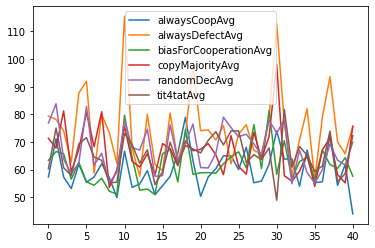

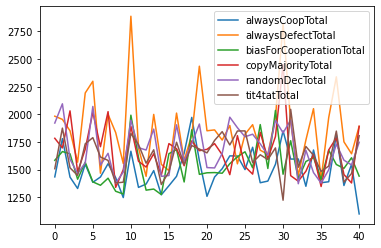

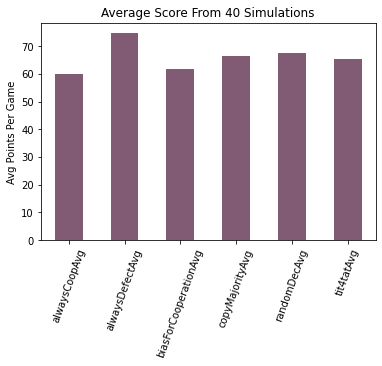

In [28]:
#Creating databases for graphing 
avgData = pd.DataFrame()
totalData = pd.DataFrame()

#Running the PrisonerDilemma 40 times to get an average simulation and spitting out data
for i in range(41):    
    p = PrisonerDilemma(.3, 50, 5)
    p.runTournament()
    

    avgRow = {}
    totalRow = {}
    for index,strat in enumerate(p.pop):
        totalRow[strat['name'] + 'Total'] = strat['totalScore']
        avgRow[strat['name'] + 'Avg'] = strat['totalScore']/(p.numberRuns*(len(p.pop)-1))

    print(avgRow)
    avgData = avgData.append(avgRow, ignore_index=True)
    totalData = totalData.append(totalRow, ignore_index=True)

print(avgData)
avgData.plot()
print(totalData)
totalData.plot()

avgDf = pd.DataFrame(avgData.mean(axis=0))
print(avgDf)
avgDf.plot.bar(title = 'Average Score From 40 Simulations', ylabel = 'Avg Points Per Game',color = '#815A74', rot = 70, legend=False)

print(p.pop)


In [29]:
#a dfiferent way to visulaize how the strategies evolve over time, from oringal to end
for strat in p.pop:
    # print(f"{strat['name']} - {strat['strat']} - {strat['original']}")
    print(strat['name'])
    print(strat['strat'])
    print(strat['original'])

tit4tat
DCCCCCCCDCDDCDDDCCCCCCCCCDDDCCDDCCDDCDDDCDDDDDDDCDDDCCDDDDDDDDDD
CDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCD
randomDec
DDCCCCCCCCDDCCDDCCCCCCCCCCDDCCDCCCDDCDDDDDDDDDDDCCDDCCDDDDDDDDDD
DCCCCCCDCCDCDCDCCDCDCCDCCCDDDDDDDCCCDDCDCDDCDDCCDCCCDCCDCCCCDCDC
biasForCooperation
DCCCCCCDCDDDCDDDCCCCCCCCCDDDDCDCCCDDCCDDCDDDDDDDCDDDCCDDDDDDDDDD
CCCCCCCCCCCCCCCCCCCCCDCDCCCCCDCDCCCCCCCCCCCCCCCCCCCCCDCDCCCCCDCD
alwaysDefect
DCCCCDCCDCDDDDDDCCCCDCCCCCDDDCDCCCDDCDDDDDDDDDDDCDDDCDDDDDDDDDDD
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
alwaysCoop
DCCCCCCCCDDDCCDDCCCCDCCCCDDDCCDCCCDDCCDDDDDDDDDDCDDDCDDDDDDDDDDD
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
copyMajority
CCCCCCCCCCDDCCDDCCCCCCCCCCDDCCDDCCDDCCDDDDDDDDDDCCDDCCDDDDDDDDDD
CCCCCCCCCCDDCCDDCCCCCCCCCCDDCCDDCCDDCCDDDDDDDDDDCCDDCCDDDDDDDDDD


In [30]:
# this function counts the number of C's and D's in a strategy (will be used to create 2D data array)
def count(stratString):
    totalC = 0
    totalD = 0
    for l in stratString:
        if l == 'C':
            totalC += 1
        else:
            totalD += 1
    return totalC, totalD

In [31]:
#Creating pandas data frame for graphing the change in C's and D's within the stratageies, meaning how the strategy evolves over time, so no longer tit4ttat for example
data = pd.DataFrame()
subData = pd.DataFrame()

stratName = []
ogCAll = []
ogDAll = []
endC = []
endD = []
totals = []
avg = []

for index,strat in enumerate(p.pop):
    stratName.append(strat['name'])
    ogC, ogD = count(strat['original'])
    ogCAll.append(ogC)
    ogDAll.append(ogD)
    C, D = count(strat['strat'])
    endC.append(C)
    endD.append(D)
    totals.append(strat['totalScore'])
    avg.append(strat['totalScore']/(p.numberRuns*(len(p.pop)-1)))

data['Strategy'] = stratName
data['OG Cs'] = ogCAll
data['OG Ds'] = ogDAll
data['End Cs'] = endC
data['End Ds'] = endD
data['Total Score'] = totals
data['AvgScore'] = avg

subData['Strategy'] = stratName
subData['OG Cs'] = ogCAll
subData['OG Ds'] = ogDAll
subData['End Cs'] = endC
subData['End Ds'] = endD

print(data)

             Strategy  OG Cs  OG Ds  End Cs  End Ds  Total Score  AvgScore
0             tit4tat     32     32      27      37         1806     72.24
1           randomDec     37     27      30      34         1747     69.88
2  biasForCooperation     56      8      27      37         1441     57.64
3        alwaysDefect      0     64      23      41         1891     75.64
4          alwaysCoop     64      0      27      37         1099     43.96
5        copyMajority     32     32      32      32         1891     75.64


<AxesSubplot:xlabel='Strategy', ylabel='Number of Coop/Defect'>

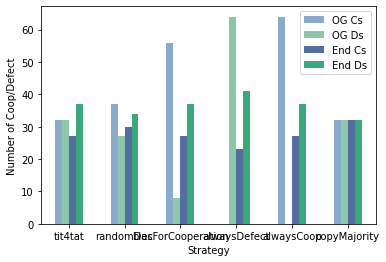

In [32]:
subData.plot.bar(x = 'Strategy', rot = 0, color=['#89A9CD','#8BC8AA','#536DA1', '#39A87B'], ylabel = 'Number of Coop/Defect')

<AxesSubplot:xlabel='Strategy', ylabel='Avg Points Per Game'>

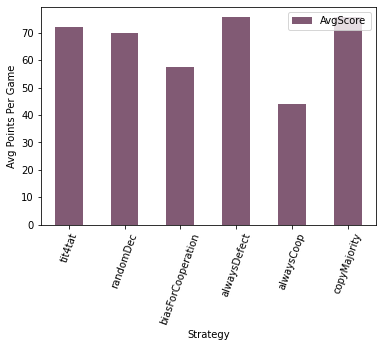

In [33]:
# Graph of the scores of each strategy after playing 1 tournament
data.plot.bar(x = 'Strategy', y = 'AvgScore', ylabel = 'Avg Points Per Game',color = '#815A74', rot = 70)


    tit4tat  randomDec  biasForCooperation  alwaysDefect  alwaysCoop  \
0        50          4                 153            55         153   
1       239          4                   0            51           0   
2       251         26                  49           255           1   
3        55         81                  50           151           9   
4        51        244                 111           183          18   
5        51         50                  50            55          89   
6        51        247                   7            51          26   
7        55         89                  50           151          34   
8        51         50                  50            51          34   
9       119         51                  89            55          89   
10       51         51                  50            51          34   
11       51        119                 119            51          34   
12       51         51                  51            51        

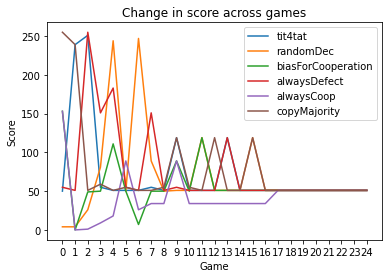

In [34]:
#graph of the last run within the 40 prisoner dilemmas run previously, helps to visualize how the score of each evolving strategy changes across time 
data = pd.DataFrame()

for index,strat in enumerate(p.pop):
    data[strat['name']] = strat['scores']

print(data)

plot1 = data.plot(ylabel='Score', xlabel='Game', title = 'Change in score across games', xticks=data.index )
plot1.set_title('Change in score across games')
plot1.set_ylabel('Score')
plot1.set_xlabel('Game')
plot1.legend(bbox_to_anchor=(1.0, 1.0))

In [35]:
#SECOND PrisonerDilemma Class with fitness function and recombination being applied at end of each tournament (play every other strategy at least once) and bestFitness = highest average points per game
from itertools import combinations
import random

class PrisonerDilemma2():
    
    def __init__(self, recombProb = .3, movesPlayed = 40, numberRuns = 1):
        global prisonersDict
        self.prisonersDict = prisonersDict                                                                          
        self.recombProb = recombProb
        self.movesPlayed = movesPlayed 
        self.numberRuns = numberRuns
        
        #randomly generate the last 3games, which strategies will use to make first move
        values = ['C', 'D']
        rando3Games = np.random.choice(values, 6)           #creating random 6 values of C or D
        self.default3Games = ''.join(rando3Games)           #removing sapces/joining
        
        t4t = tit4tat()
        random = randomDec()
        biasForCoop = biasForCooperation()
        defect = alwaysDefect()
        coop = alwaysCooperate()
        copyMaj = copyMajority()

        self.pop = [
            {'name' : 'tit4tat', 'strat': t4t, 'last3Moves': self.default3Games, 'currentTournyScores': [], 'scores' : [], 'totalScore': 0, 'original' : copy.deepcopy(t4t)},
            {'name' : 'randomDec', 'strat': random,'last3Moves': self.default3Games, 'currentTournyScores': [], 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(random)},
            {'name' : 'biasForCooperation', 'strat': biasForCoop,'last3Moves': self.default3Games, 'currentTournyScores': [], 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(biasForCoop)}, 
            {'name' : 'alwaysDefect', 'strat': defect, 'last3Moves': self.default3Games, 'currentTournyScores': [], 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(defect)}, 
            {'name' : 'alwaysCoop', 'strat': coop, 'last3Moves': self.default3Games, 'currentTournyScores': [], 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(coop)}, 
            {'name' : 'copyMajority', 'strat': copyMaj, 'last3Moves': self.default3Games, 'currentTournyScores': [], 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(copyMaj)}
        ]
                    
    def runTournament(self):
        for tourny in range(self.numberRuns):
            games = list(combinations(self.pop, 2))   #each strat will paly everyother strat once
            random.shuffle(games)
            for (strat1, strat2) in games:      #strat1 and 2 will reference the strategies playing in the current game
                #print(f'{strat1['name']} vs {strat2['name']}') # combinations causes the strategies to play eachother in set order
                self.strat1CurrentGameScore = 0
                self.strat2CurrentGameScore = 0
                for num in range(self.movesPlayed + 1):     #default 40 moves made per game
                    #calls find move funciton to have strategy pic move based on last 3 games
                    moveStrat1 = self.findMove(strat1)
                    # print('strat1 move - ' + moveStrat1)
                    moveStrat2 = self.findMove(strat2)
                    # print('strat2 move - ' + moveStrat2)

                    #compares moves to determine points earned and total score
                    self.compareMovesAndUpdateScore(moveStrat1, moveStrat2, strat1, strat2)         
                    #updates memory aka the last 3 games
                    self.updateMemory(moveStrat1, moveStrat2, strat1, strat2)
                
                if self.strat1CurrentGameScore > self.strat2CurrentGameScore:
                    print(f"{strat1['name']}: {self.strat1CurrentGameScore} beat {strat2['name']}: {self.strat2CurrentGameScore}")
                elif self.strat2CurrentGameScore > self.strat1CurrentGameScore:
                    print(f"{strat2['name']}: {self.strat2CurrentGameScore} beat {strat1['name']}: {self.strat1CurrentGameScore}")
                else:
                    print(f"{strat2['name']} tied {strat1['name']} - {self.strat1CurrentGameScore}")
                
                #adding to array of scores from each game
                strat1['scores'].append(self.strat1CurrentGameScore)
                strat2['scores'].append(self.strat2CurrentGameScore)

                # Storing tournament specific scores for fitness function
                strat1['currentTournyScores'].append(self.strat1CurrentGameScore)
                strat2['currentTournyScores'].append(self.strat2CurrentGameScore)

                #at end of game need to reset last3Moves to default
                strat1['last3Moves'] = self.default3Games
                strat2['last3Moves'] = self.default3Games

            #Fitness Function and Recombination getting applied
            self.fitnessFunctionandRecombination(tourny)

            # Resetting temp tourny scores
            for index,strat in enumerate(self.pop):
                strat['currentTournyScores'] = []
    
    def findMove(self, currentStrat):
        index = self.prisonersDict[currentStrat['last3Moves']]
        return currentStrat['strat'][index]
    
    def compareMovesAndUpdateScore(self, moveStrat1, moveStrat2, strat1, strat2):
        if moveStrat1 == 'C' and moveStrat2 == 'C':
            strat1['totalScore'] += 3
            strat2['totalScore'] += 3
            self.strat1CurrentGameScore += 3
            self.strat2CurrentGameScore += 3
        elif moveStrat1 == 'C' and moveStrat2 == 'D':
            strat2['totalScore'] += 5
            self.strat2CurrentGameScore += 5
        elif moveStrat1 == 'D' and moveStrat2 == 'C':
            strat1['totalScore'] += 5
            self.strat1CurrentGameScore += 5
        else:
            strat1['totalScore'] += 1
            strat2['totalScore'] += 1
            self.strat1CurrentGameScore += 1
            self.strat2CurrentGameScore += 1

    def updateMemory(self, moveStrat1, moveStrat2, strat1, strat2):
        # print('strat1Last3 moves ' + strat1['last3Moves'])   
        # print('strat2Last3 moves ' + strat2['last3Moves'])    
 
        strat1['last3Moves'] = strat1['last3Moves'][2:] + moveStrat1 + moveStrat2
        strat2['last3Moves'] = strat2['last3Moves'][2:] + moveStrat2 + moveStrat1

    #FITNESS FUNCTION - strat with highest average points earned after playing 40 moves against other strategy
    def fitnessFunctionandRecombination(self, tournyNum):
        highestAverage = 0
        for strat in self.pop:
            stratAvg = np.average(strat['currentTournyScores'])
            if stratAvg > highestAverage:
                highestAverage = stratAvg
                bestStrat = strat

        print(f"{bestStrat['name']} won with an average score of {highestAverage}")

        for st in self.pop:
            if st['name'] != bestStrat['name']:
                for gene in range(64):                          
                    #recombination can happen at every gene which represents moves 
                    if (np.random.random() < self.recombProb):  
                        st['strat'] = st['strat'][:gene] + bestStrat['strat'][gene] + st['strat'][gene+1:]




In [36]:
p = PrisonerDilemma2(.2, 50, 5)
p.runTournament()
for strat in p.pop:
    print(strat)

alwaysCoop tied biasForCooperation - 153
copyMajority: 255 beat alwaysCoop: 0
copyMajority: 63 beat biasForCooperation: 48
alwaysDefect: 63 beat biasForCooperation: 48
alwaysDefect: 55 beat tit4tat: 50
alwaysDefect: 255 beat alwaysCoop: 0
randomDec: 157 beat biasForCooperation: 147
randomDec: 157 beat alwaysCoop: 147
biasForCooperation tied tit4tat - 153
copyMajority: 55 beat tit4tat: 50
randomDec: 55 beat tit4tat: 50
copyMajority tied alwaysDefect - 51
alwaysCoop tied tit4tat - 153
alwaysDefect: 199 beat randomDec: 14
copyMajority: 199 beat randomDec: 14
alwaysDefect won with an average score of 124.6
randomDec: 55 beat tit4tat: 50
alwaysDefect: 251 beat alwaysCoop: 1
randomDec: 182 beat alwaysCoop: 92
biasForCooperation tied tit4tat - 153
copyMajority tied alwaysDefect - 51
randomDec: 139 beat biasForCooperation: 79
alwaysCoop: 155 beat biasForCooperation: 150
alwaysDefect: 55 beat tit4tat: 50
copyMajority: 199 beat randomDec: 14
copyMajority: 251 beat alwaysCoop: 1
alwaysCoop tied t

In [37]:
#a dfiferent way to visulaize how the strategies evolve over time, from oringal to end
for strat in p.pop:
    # print(f"{strat['name']} - {strat['strat']} - {strat['original']}")
    print(strat['name'])
    print(strat['strat'])
    print(strat['original'])

tit4tat
DCDDCDCDCDCDDDCDCDDDCDDDCDCDCDCDCDDDCDCDCDDDDCDDCDDDCDCDDDDDCCCD
CDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCD
randomDec
DCCDCDDDCDCDDDCCCDDDDDDCDDCDDDCCCDDDDCCDCDDCDCCDCDDDDDCDDDDDDCCD
CCCDDDDDCCCDCDDCCDCDCDDCDDCDDCCCCCDDCCCDCDCCDCCDCDDDDCCDDCDCCCDD
biasForCooperation
DDCDCDCCDDDCDDDCCDDDCDCDDCCDDDCDCDCCCCDCCCDDDDDDCDDCCDCDDDDCDDCD
CCCCCCCCCCCCCCCCCCCCCDCDCCCCCDCDCCCCCCCCCCCCCCCCCCCCCDCDCCCCCDCD
alwaysDefect
DDCDCDDDCDDDDDCDDDDDDDDDCDDDCDDCDDDDDDDDCDDDDDDDCDDDDDDDDDDDDDCD
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
alwaysCoop
DDDDCCDCDCDDCDCDCCDDCCCCDCCCCDDCCCDDDCCCDCDDDDDDDDCDCCCDDCCDDDCD
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
copyMajority
CDDDDCDCCDDDCCCDDDCCCDCDCDDDCCDDDDDDDDDDCDDDDCDDCCDDCDDDDDDDDDCD
CCCCCCCCCCDDCCDDCCCCCCCCCCDDCCDDCCDDCCDDDDDDDDDDCCDDCCDDDDDDDDDD


In [38]:
#looking at the total points earned across all games (basiclly just trying to figure out what fitness function differentitates strategies the best)
data = pd.DataFrame()

stratName = []
totals = []

for index,strat in enumerate(p.pop):
    stratName.append(strat['name'])
    totals.append(strat['totalScore'])

data['Strategy'] = stratName
data['Total Score'] = totals

print(data)


             Strategy  Total Score
0             tit4tat         2251
1           randomDec         1959
2  biasForCooperation         2204
3        alwaysDefect         2491
4          alwaysCoop         1787
5        copyMajority         2515


<AxesSubplot:xlabel='Strategy', ylabel='Total Points'>

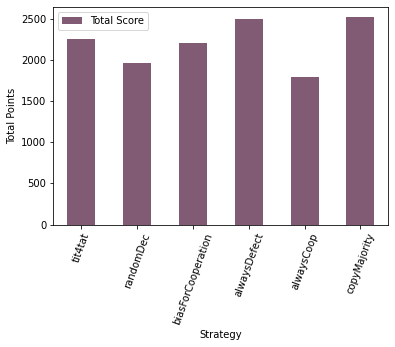

In [39]:
data.plot.bar(x = 'Strategy', y = 'Total Score', ylabel = 'Total Points',color = '#815A74', rot = 70)
# how mnay total points socred across games

In [40]:
data2 = pd.DataFrame()

for index,strat in enumerate(p.pop):
    data2[strat['name']] = strat['scores']

print(data2)

    tit4tat  randomDec  biasForCooperation  alwaysDefect  alwaysCoop  \
0        50        157                 153            63         153   
1       153        157                  48            55           0   
2        50         55                  48           255           0   
3        50         14                 147            51         147   
4       153         14                 153           199         153   
5        50         55                 153           251           1   
6       153        182                  79            51          92   
7        50        139                 150            55         155   
8       152         14                  48            63           1   
9        50         14                  48           199         152   
10       51        227                  50            51          27   
11      127         26                 101            51           2   
12      132         62                 102            55        

<AxesSubplot:ylabel='Points'>

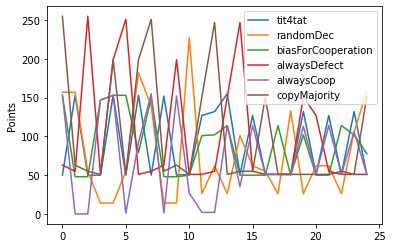

In [41]:
data2.plot(ylabel = 'Points')
# how many points scored per game from one simulation 

In [42]:
#THIRD AND BEST PrisonerDilemma Class with fitness function and recombination applied at end of each tournament (play every other strategy at least once)
# and bestFitness = strategy with most wins
from itertools import combinations
import random

class PrisonerDilemma3():
    
    def __init__(self, recombProb = .3, movesPlayed = 40, numberRuns = 1):
        global prisonersDict
        self.prisonersDict = prisonersDict                                                                          
        self.recombProb = recombProb
        self.movesPlayed = movesPlayed 
        self.numberRuns = numberRuns
        
        #randomly generate the last 3games, which strategies will use to make first move
        values = ['C', 'D']
        rando3Games = np.random.choice(values, 6)           #creating random 6 values of C or D
        self.default3Games = ''.join(rando3Games)           #removing sapces/joining

        t4t = tit4tat()
        random = randomDec()
        biasForCoop = biasForCooperation()
        defect = alwaysDefect()
        coop = alwaysCooperate()
        copyMaj = copyMajority()

        self.pop = [
            {'name' : 'tit4tat', 'strat': t4t, 'last3Moves': self.default3Games, 'gamesWon': 0, 'scores' : [], 'totalScore': 0, 'original' : copy.deepcopy(t4t)},
            {'name' : 'randomDec', 'strat': random,'last3Moves': self.default3Games, 'gamesWon': 0, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(random)}, 
            {'name' : 'biasForCooperation', 'strat': biasForCoop, 'last3Moves': self.default3Games, 'gamesWon': 0, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(biasForCoop)}, 
            {'name' : 'alwaysDefect', 'strat': defect, 'last3Moves': self.default3Games, 'gamesWon': 0, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(defect)},
            {'name' : 'alwaysCoop', 'strat': coop, 'last3Moves': self.default3Games, 'gamesWon': 0, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(coop)}, 
            {'name' : 'copyMajority', 'strat': copyMaj, 'last3Moves': self.default3Games, 'gamesWon': 0, 'scores' : [], 'totalScore': 0, 'original': copy.deepcopy(copyMaj)}
        ]
                    
    def runTournament(self):
        for tourny in range(self.numberRuns):
            games = list(combinations(self.pop, 2))   #each strat will paly everyother strat once
            random.shuffle(games)
            for (strat1, strat2) in games:      #strat1 and 2 will reference the strategies playing in the current game
                #print(f'{strat1['name']} vs {strat2['name']}') # combinations causes the strategies to play eachother in set order
                self.strat1CurrentGameScore = 0
                self.strat2CurrentGameScore = 0
                for num in range(self.movesPlayed + 1):     #default 40 moves made per game
                    #calls find move funciton to have strategy pic move based on last 3 games
                    moveStrat1 = self.findMove(strat1)
                    # print('strat1 move - ' + moveStrat1)
                    moveStrat2 = self.findMove(strat2)
                    # print('strat2 move - ' + moveStrat2)

                    #compares moves to determine points earned and total score
                    self.compareMovesAndUpdateScore(moveStrat1, moveStrat2, strat1, strat2)         
                    #updates memory aka the last 3 games
                    self.updateMemory(moveStrat1, moveStrat2, strat1, strat2)
                
                if self.strat1CurrentGameScore > self.strat2CurrentGameScore:
                    # print(f"{strat1['name']}: {self.strat1CurrentGameScore} beat {strat2['name']}: {self.strat2CurrentGameScore}")
                    strat1['gamesWon'] += 1
                elif self.strat2CurrentGameScore > self.strat1CurrentGameScore:
                    # print(f"{strat2['name']}: {self.strat2CurrentGameScore} beat {strat1['name']}: {self.strat1CurrentGameScore}")
                    strat2['gamesWon'] += 1
                # else:
                    # print(f"{strat2['name']} tied {strat1['name']} - {self.strat1CurrentGameScore}")
                
                #adding to array of scores from each game
                strat1['scores'].append(self.strat1CurrentGameScore)
                strat2['scores'].append(self.strat2CurrentGameScore)

                #at end of game need to reset last3Moves to default
                strat1['last3Moves'] = self.default3Games
                strat2['last3Moves'] = self.default3Games

            #Fitness Function and Recombination getting applied
            self.fitnessFunctionandRecombination(tourny)
    
    def findMove(self, currentStrat):
        index = self.prisonersDict[currentStrat['last3Moves']]
        return currentStrat['strat'][index]
    
    def compareMovesAndUpdateScore(self, moveStrat1, moveStrat2, strat1, strat2):
        if moveStrat1 == 'C' and moveStrat2 == 'C':
            strat1['totalScore'] += 3
            strat2['totalScore'] += 3
            self.strat1CurrentGameScore += 3
            self.strat2CurrentGameScore += 3
        elif moveStrat1 == 'C' and moveStrat2 == 'D':
            strat2['totalScore'] += 5
            self.strat2CurrentGameScore += 5
        elif moveStrat1 == 'D' and moveStrat2 == 'C':
            strat1['totalScore'] += 5
            self.strat1CurrentGameScore += 5
        else:
            strat1['totalScore'] += 1
            strat2['totalScore'] += 1
            self.strat1CurrentGameScore += 1
            self.strat2CurrentGameScore += 1

    def updateMemory(self, moveStrat1, moveStrat2, strat1, strat2): 
        strat1['last3Moves'] = strat1['last3Moves'][2:] + moveStrat1 + moveStrat2
        strat2['last3Moves'] = strat2['last3Moves'][2:] + moveStrat2 + moveStrat1

    #FITNESS FUNCTION - strat with highest points earned after playing 40 moves against other strategy
    def fitnessFunctionandRecombination(self, tournyNum):
        highestWins = 0
        for strat in self.pop:
            wins = strat['gamesWon']
            if wins > highestWins:
                highestWins = wins
                bestStrat = strat

        print(f"{bestStrat['name']} won the most games with {highestWins}")

        for st in self.pop:
            if st['name'] != bestStrat['name']:
                for gene in range(64):                          
                    #recombination can happen at every gene which represents moves 
                    if (np.random.random() < self.recombProb):  
                        st['strat'] = st['strat'][:gene] + bestStrat['strat'][gene] + st['strat'][gene+1:]




In [43]:
#same as strategy one graphing and running 40 simulations of the run to see what strategy is the best on average
avgData = pd.DataFrame()
totalData = pd.DataFrame()

for i in range(41):    
    p = PrisonerDilemma3(.3, 50, 5)
    p.runTournament()
    

    avgRow = {}
    totalRow = {}
    for index,strat in enumerate(p.pop):
        totalRow[strat['name'] + 'Total'] = strat['totalScore']
        avgRow[strat['name'] + 'Avg'] = strat['totalScore']/(p.numberRuns*(len(p.pop)-1))

    # print(avgRow)
    avgData = avgData.append(avgRow, ignore_index=True)
    totalData = totalData.append(totalRow, ignore_index=True)

print(avgData)

print(totalData)
avgDf = pd.DataFrame(avgData.mean(axis=0))
print(avgDf)

print(p.pop)

alwaysDefect won the most games with 3
alwaysDefect won the most games with 6
alwaysDefect won the most games with 8
alwaysDefect won the most games with 10
alwaysDefect won the most games with 12
alwaysDefect won the most games with 4
alwaysDefect won the most games with 8
alwaysDefect won the most games with 11
alwaysDefect won the most games with 14
alwaysDefect won the most games with 16
randomDec won the most games with 3
randomDec won the most games with 5
alwaysDefect won the most games with 8
alwaysDefect won the most games with 11
alwaysDefect won the most games with 12
randomDec won the most games with 3
alwaysDefect won the most games with 7
alwaysDefect won the most games with 10
alwaysDefect won the most games with 13
alwaysDefect won the most games with 14
alwaysDefect won the most games with 5
alwaysDefect won the most games with 10
alwaysDefect won the most games with 15
alwaysDefect won the most games with 20
alwaysDefect won the most games with 23
alwaysDefect won the

<AxesSubplot:title={'center':'Average Score From 40 Simulations'}, ylabel='Avg Points Per Game'>

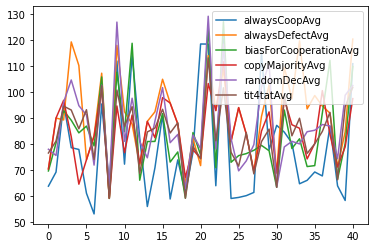

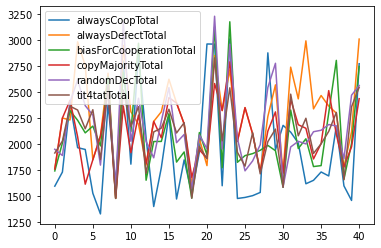

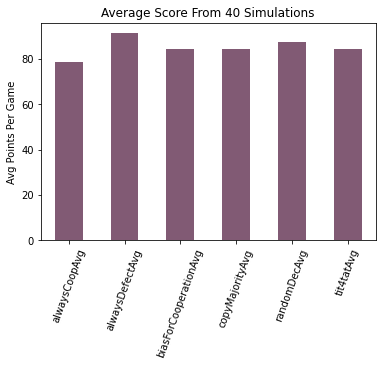

In [44]:
avgData.plot()
totalData.plot()
avgDf.plot.bar(title = 'Average Score From 40 Simulations', ylabel = 'Avg Points Per Game',color = '#815A74', rot = 70, legend=False)


In [45]:
#again looking at how the strategy string changes from beginging to end - helps determine what type of strategy seems to be best : index maps onto decision given past 3 games 
for strat in p.pop:
    # print(f"{strat['name']} - {strat['strat']} - {strat['original']}")
    print(strat['name'])
    print(strat['strat'])
    print(strat['original'])

tit4tat
DCCDCDCDCCCCCDDDDDDDDDCDCCDDDCCDCDCCDDDCCDCCDDDDCDDDCCCDDCCDCCCD
CDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCDCD
randomDec
DCCDDDCCDCCCDCDDDDDDDCDDCCDDDCDCCCCCDDDCCDCDDDDDCDDDCCDDDCCDDCDD
DCCDDDCCCCCCDCCDDDDDCCDDCCDDDCDCCCCCDDDCCDCCDDDDCDDDCCDDDCCDDCCD
biasForCooperation
DCCCDDCCCCCCDCDDDDDCDDDDCCDDDCCDCDCCDCDCCDCCDDDCCDDDCDDDDCCDDCCD
CCCCCCCCCCCCCCCCCCCCCDCDCCCCCDCDCCCCCCCCCCCCCCCCCCCCCDCDCCCCCDCD
alwaysDefect
DCCDDDCCDCCCDCDDDDDDDDDDCCDDDCDDCDCCDDDCCDCDDDDDCDDDCDDDDCCDDCDD
DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
alwaysCoop
DCCDCDCCCCCCDCDCCCDDCCDCCCDCDCDCCCCCDDDCCDCDCDCDCCDDCCDDDCCDCCDC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
copyMajority
DCCCDDCCCCCDDCCDDDDDDCDDCCDDDCDDCDCCDDDCCDCDDDDDCDDDCCDDDCCDDCDD
CCCCCCCCCCDDCCDDCCCCCCCCCCDDCCDDCCDDCCDDDDDDDDDDCCDDCCDDDDDDDDDD


    tit4tat  randomDec  biasForCooperation  alwaysDefect  alwaysCoop  \
0        50         51                 153            55         153   
1       153         63                 153            51         153   
2       153        179                 153            63         153   
3        58        179                  48           255         114   
4       153        179                 114           255           0   
5        51         63                 153            51         153   
6       144         51                  58           251         150   
7       155         51                 160           247         150   
8        51        163                 104            51          75   
9       149        179                   7           205         114   
10      144         51                 104            72          94   
11       51        173                 163            51          94   
12      169        169                 137            51        

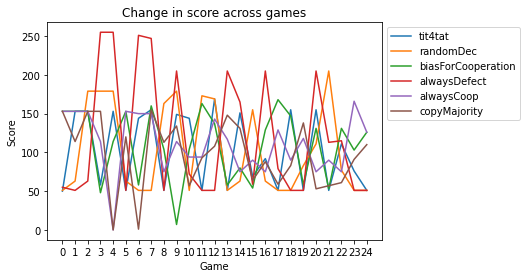

In [46]:
#graphing the last run of the 40 simulations to see how strategeis score changes over time 
data = pd.DataFrame()

for index,strat in enumerate(p.pop):
    data[strat['name']] = strat['scores']

print(data)

plot1 = data.plot(ylabel='Score', xlabel='Game', title = 'Change in score across games', xticks=data.index )
plot1.set_title('Change in score across games')
plot1.set_ylabel('Score')
plot1.set_xlabel('Game')
plot1.legend(bbox_to_anchor=(1.0, 1.0))